# 📝 Exercise M4.01

The aim of this exercise is two-fold:

* understand the parametrization of a linear model;
* quantify the fitting accuracy of a set of such models.

We will reuse part of the code of the course to:

* load data;
* create the function representing a linear model.

## Prerequisites

### Data loading

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

### Model definition

In [2]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

## Main exercise

Define a vector `weights = [...]` and a vector `intercepts = [...]` of the
same length. Each pair of entries `(weights[i], intercepts[i])` tags a
different model. Use these vectors along with the vector
`flipper_length_range` to plot several linear models that could possibly fit
our data. Use the above helper function to visualize both the models and the
real samples.

In [3]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)

Text(0.5, 1.0, 'Body Mass as a function of the Flipper Length')

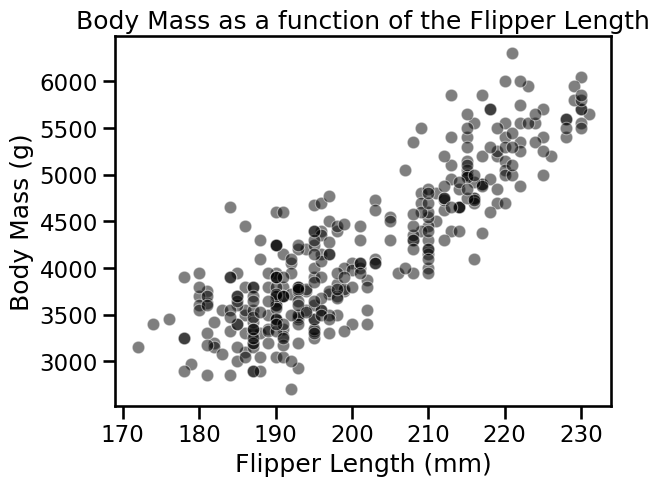

In [4]:
import seaborn as sns

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.set_title("Body Mass as a function of the Flipper Length")

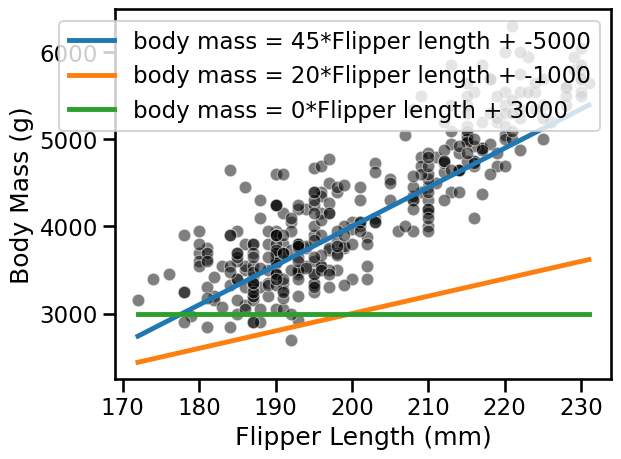

In [15]:
# Write your code here.
weights = [45, 20, 0]
intercepts = [-5000, -1000, 3000]

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
    )

labels = []
for i in range(0, len(weights)):
    weight = weights[i]
    intercept = intercepts[i]
    predicted_body_mass = linear_model_flipper_mass(
        flipper_length_range, weight, intercept
    )
    label = f'body mass = {weight}*Flipper length + {intercept}'
    ax.plot(flipper_length_range, predicted_body_mass, label=label)
    
_ = ax.legend()

In the previous question, you were asked to create several linear models. The
visualization allowed you to qualitatively assess if a model was better than
another.

Now, you should come up with a quantitative measure which indicates the
goodness of fit of each linear model and allows you to select the best model.
Define a function `goodness_fit_measure(true_values, predictions)` that takes
as inputs the true target values and the predictions and returns a single
scalar as output.

In [16]:
# Write your code here.
def goodness_fit_measure(true_values, predictions):
    return np.mean((true_values - predictions)**2)

You can now copy and paste the code below to show the goodness of fit for each
model.

```python
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")
```

In [21]:
# Write your code here.
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data[feature_name], weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight:.2f} (g / mm) * flipper length + {intercept:.2f} (g)")
    print(f"Error: {goodness_fit_measure(target, target_predicted):.3f}\n")

Model #0:
45.00 (g / mm) * flipper length + -5000.00 (g)
Error: 184657.383

Model #1:
20.00 (g / mm) * flipper length + -1000.00 (g)
Error: 1728839.035

Model #2:
0.00 (g / mm) * flipper length + 3000.00 (g)
Error: 2085464.181

